## Introduction:

Aujourd'hui, la santé mentale occupe une place prépondérante, notamment dans les secteurs technologiques.Alors que ces entreprises sont souvent à la pointe de l'innovation et de la technologie, elles sont également confrontées à des défis uniques en matière de bien-être mental de leurs employés. Les environnements de travail rapides, compétitifs et axés sur les résultats peuvent entraîner un stress, une pression intense et des exigences élevées, ce qui peut avoir un impact significatif sur la santé mentale des individus. La reconnaissance de l'importance de la santé mentale dans ces entreprises est essentielle non seulement pour le bien-être des employés, mais aussi pour la performance globale de l'entreprise. 
Dans cette analyse, Nous utilisons une enquête menée en 2014 par OSMI Mental Health in Tech Survey qui vise à évaluer les attitudes envers la santé mentale et la prévalence des troubles de santé mentale au sein des entreprises du secteur technologique.

Énoncé du problème :

-Identifiez les principales caractéristiques qui entraînent des problèmes de santé mentale dans l'espace technologique.
-Etudier la relation entre les troubles de santé mentale et les variables utilises.
-Identifier les prédicteurs les plus forts de la maladie mentale.
-Prédire si un patient doit être traité pour sa maladie mentale ou non selon les valeurs obtenues .

Plus value:

Les entreprises peuvent utiliser ce modèle pour mieux connaître les problèmes de santé mentale des employés et offrir des avantages aux employés dans le besoin, utilisant ainsi efficacement les ressources de l'entreprise. Ce modèle peut aider à réduire les coûts supplémentaires liés à la fourniture de prestations de santé mentale aux personnes qui ne recherchent pas et n'utilisent pas cet argent pour d'autres prestations de cet employé. Cela finira par augmenter la satisfaction des employés, ce qui entraînera la rétention des employés dans l'ensemble.
À partir de cette recherche, cet apprentissage automatique peut aider les RH à voir quels facteurs l'entreprise doit prendre en charge pour que l'employé souhaite obtenir un traitement de santé mentale.



## Importation des Libraries

In [375]:
import numpy as np
import pandas as pd

#Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

#Splitting
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn import metrics

In [376]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [377]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# I. Data and Preprocessing (cleaning, missing values, recoding)

## 1. Data Loading

In [378]:
data=pd.read_csv('survey.csv')

data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-14 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-14 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-14 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-14 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-14 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [379]:
print(data.shape)

(1259, 27)


In [380]:
print(data.describe)

<bound method NDFrame.describe of            Timestamp  Age  Gender         Country state self_employed  \
0     27-08-14 11:29   37  Female   United States    IL           NaN   
1     27-08-14 11:29   44       M   United States    IN           NaN   
2     27-08-14 11:29   32    Male          Canada   NaN           NaN   
3     27-08-14 11:29   31    Male  United Kingdom   NaN           NaN   
4     27-08-14 11:30   31    Male   United States    TX           NaN   
...              ...  ...     ...             ...   ...           ...   
1254  12-09-15 11:17   26    male  United Kingdom   NaN            No   
1255   26-09-15 1:07   32    Male   United States    IL            No   
1256  07-11-15 12:36   34    male   United States    CA            No   
1257  30-11-15 21:25   46       f   United States    NC            No   
1258  01-02-16 23:04   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \
0                No 

#### Afin de faciliter le travail, nous allons convertir tous les noms des variables en lettres minuscules:

In [381]:
data.columns=data.columns.str.lower()

In [382]:
data.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [383]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  1259 non-null   object
 1   age                        1259 non-null   int64 
 2   gender                     1259 non-null   object
 3   country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [384]:
data.rename(columns = {'no_employees':'employee_numbers'}, inplace = True)

data.rename(columns = {'leave':'medical_leave'}, inplace = True)
data.head(3)

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,employee_numbers,...,medical_leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-14 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-14 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-14 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


#### Notre base de donnee contient 27 colonnes (variables) et 1259 lignes (valeurs - candidats, qui ont répondu aux questions).
#### Nous remarquons que toutes les variables sont de type objet, à l'exception de la variable "age" qui est numérique. Avant de procéder au décodage de ces variables, il est essentiel d'effectuer un nettoyage des données. Pendant cette étape, nous éliminerons les valeurs aberrantes, supprimerons les doublons et gérerons les valeurs manquantes.


## 2. Data Cleaning

### Analyse des valeurs manquantes :

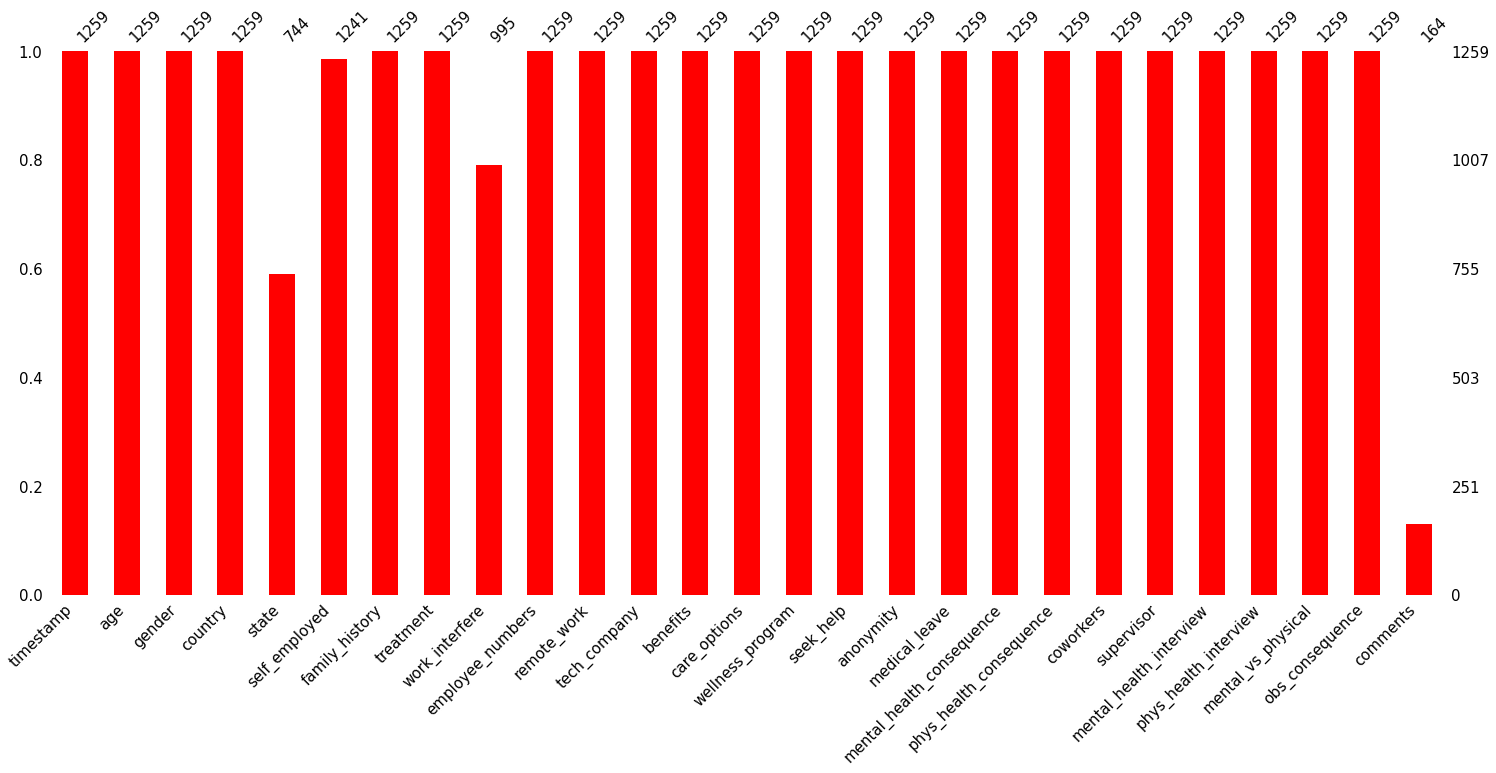

In [385]:
import missingno as msno
msno.bar(data,fontsize=15,color='red');

In [386]:
somme =data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False))*100
missing_values = pd.concat([somme, percentage], axis=1, keys=['somme_na', 'Percentage_na'])
print(missing_values)

                           somme_na  Percentage_na
comments                       1095      86.973789
state                           515      40.905481
work_interfere                  264      20.969023
self_employed                    18       1.429706
seek_help                         0       0.000000
obs_consequence                   0       0.000000
mental_vs_physical                0       0.000000
phys_health_interview             0       0.000000
mental_health_interview           0       0.000000
supervisor                        0       0.000000
coworkers                         0       0.000000
phys_health_consequence           0       0.000000
mental_health_consequence         0       0.000000
medical_leave                     0       0.000000
anonymity                         0       0.000000
timestamp                         0       0.000000
wellness_program                  0       0.000000
age                               0       0.000000
benefits                       

In [387]:
data['state'].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

#### On remarque que la colonne "comments" contient le plus grand nombre de valeurs nulles, avec 87% des données manquantes. Nous constatons également que la colonne "state" présente un taux de 40% de valeurs manquantes et toutes les réponses correspondent à des États des États-Unis.                                                                                                                                                          
#### On trouve que la colonne "timestamp" est inutile pour l'analyse car ellecar elle contient la date, le mois, l'année et l'heure à laquelle le répondant a rempli ce questionnaire, ce qui est sans importance pour nous. Nous allons alors supprimer ces trois colonnes "state", "comments" et "timestamp".

In [388]:
data.drop(columns=['comments','state','timestamp'],axis=1,inplace=True)

In [389]:
data

,age,gender,country,self_employed,family_history,treatment,work_interfere,employee_numbers,remote_work,tech_company,...,anonymity,medical_leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,Jun-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,Jun-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


#### 20% des données pour "self employed" sont manquantes. Nous allons donc remplacer les valeurs manquantes par "NO" c'est a dire non self employed. 
#### La variable "Work_interfere" contient près de 20% de valeurs nulles. Par conséquent, nous allons remplacer ces valeurs par "Don't know" étant donné qu'elles n'ont pas été renseignées par les répondants.

In [390]:
data['self_employed'] = data['self_employed'].fillna('No')
print(data['self_employed'].unique())

['No' 'Yes']


In [391]:
data['work_interfere'] = data['work_interfere'].fillna('Don\'t know' )
print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [392]:
data.head()

,age,gender,country,self_employed,family_history,treatment,work_interfere,employee_numbers,remote_work,tech_company,...,anonymity,medical_leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,Jun-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,Jun-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### Analyse de la variable "country"

In [393]:
print(data['country'].value_counts())

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

#### On remarque que la plupart des reponses sont des États-Unis. Il serait donc trompeur de conclure qu'un certain pays est confronté par des problèmes de santé mentale chez les employés que d'autres pays De plus, de nombreux pays n'ont qu'un seul répondant, ce qui rend la colonne "pays" peu significative. Nous allons donc la supprimer.

In [394]:
data.drop(columns=['country'],axis=1,inplace=True)

### Analyse de la variable "age":

In [395]:
data['age'].value_counts().reset_index()

,index,age
0,29,85
1,32,82
2,26,75
3,27,71
4,33,70
5,28,68
6,31,67
7,34,65
8,30,63
9,25,61


In [396]:
print(data.age.describe().astype(int))

count          1259
mean       79428148
std     -2147483648
min           -1726
25%              27
50%              31
75%              36
max     -2147483648
Name: age, dtype: int32


#### On trouve des valeurs d'âge négatives. De plus, la valeur maximale de l'âge est de 999999, ce qui ne semble clairement pas cohérent et peut-être une erreur de saisie. Nous allons supprimer les valeurs correspondent aux âges inférieurs à 16 et supérieurs à 100.

In [397]:
data = data[(data.age >= 16) & (data.age <= 75)]
print(data.age.describe().astype(int))

count    1251
mean       32
std         7
min        18
25%        27
50%        31
75%        36
max        72
Name: age, dtype: int32


<AxesSubplot:>

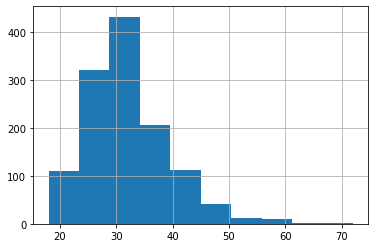

In [398]:
data['age'].hist()

In [399]:
print('Range of column age (after) :'  , (data.age.min(), data.age.max()))

Range of column age (after) : (18, 72)


###  Analyse de la variable "gender":

In [400]:
data['gender'].value_counts()

Male                                              612
male                                              204
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man                     

In [401]:
data['gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

#### La colonne "Gender" contient 49 réponses distinctes. Nous allons renommer et regrouper les réponses qui ont la même signification. Ainsi, nous allons les séparer en les catégories suivantes :
#### - Male : né en tant qu'homme et s'identifie en tant qu'homme.
#### - Female : née en tant que femme et s'identifie en tant que femme.
#### - Other: Queer, lesbienne, gay, bisexuel(le) et personnes transgenres vont être regroupés sous le terme "Other".


In [402]:
data['gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)
data['gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

data['gender'].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14412\795833617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\795833617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\795833617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [403]:
data['gender'].value_counts()

Male      986
Female    247
Other      18
Name: gender, dtype: int64

### Analyse de la variable employee_numbers:

In [404]:
data.employee_numbers.unique()

array(['Jun-25', 'More than 1000', '26-100', '100-500', '01-May',
       '500-1000'], dtype=object)

In [405]:
data['employee_numbers'].replace(['Jun-25'], '6-25', inplace = True)
data['employee_numbers'].replace(['5-Jan'], '1-5', inplace = True)
data['employee_numbers'].replace(['01-May'], '1-5', inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14412\1165939560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['employee_numbers'].replace(['Jun-25'], '6-25', inplace = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\1165939560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['employee_numbers'].replace(['5-Jan'], '1-5', inplace = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\1165939560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [406]:
data['employee_numbers'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

## 2. Data Encoding

#### Toutes les colonnes, à l'exception de l'âge, sont catégoriques. Nous utiliserons l'encodage par étiquette (label encoding) pour le target "treatment". Pour les autres colonnes, nous utiliserons l'encodeur ordinal (ordinal encoder) afin de capturer la relation entre les catégories.

### Target encoding : treatment

In [407]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
data.treatment = lb_encoder.fit_transform(data.treatment)

C:\Users\admin\AppData\Local\Temp\ipykernel_14412\4049900141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.treatment = lb_encoder.fit_transform(data.treatment)


###### 0 : No Treatment
###### 1 : Get Treatment

### Features Encoding

In [408]:
gender=['Female','Male','Other']
self_employed_cols = ['No','Yes']
family_history_cols = ['No','Yes']
work_interfere_cols = ['Never','Rarely',"Don't know",'Sometimes','Often']
no_employees_cols = ['1-5','6-25','26-100','100-500','500-1000','More than 1000']
remote_work_cols = ['No','Yes']
tech_company_cols = ['No','Yes']
benefits_cols = ['No','Don\'t know','Yes'] 
care_options_cols = ['No','Not sure','Yes']
wellness_program_cols  =['No','Don\'t know','Yes']
seek_help_cols = ['No','Don\'t know','Yes']
anonymity_cols = ['No','Don\'t know','Yes']
leave_cols = [ 'Very easy', 'Somewhat easy',"Don't know" ,'Somewhat difficult','Very difficult']
mental_health_consequence_cols = ['No','Maybe','Yes']
phys_health_consequence_cols = ['No','Maybe','Yes']
coworkers_col = ['No','Some of them','Yes']
supervisor_cols = ['No','Some of them','Yes']
mental_health_interview_cols = ['No','Maybe','Yes']
phys_health_interview_cols = ['No','Maybe','Yes']
mental_vs_physical_cols = ["Don't know",'No','Yes']
obs_consequence_cols = ['No','Yes']

ordinal_encoder = OrdinalEncoder(categories=[gender,self_employed_cols,family_history_cols,work_interfere_cols,no_employees_cols,remote_work_cols,
                            tech_company_cols,benefits_cols,care_options_cols,wellness_program_cols,seek_help_cols,anonymity_cols,leave_cols,
                            mental_health_consequence_cols,phys_health_consequence_cols,coworkers_col,supervisor_cols,mental_health_interview_cols,
                            phys_health_interview_cols,mental_vs_physical_cols,obs_consequence_cols])
cat_cols = ['gender','self_employed', 'family_history', 'work_interfere', 'employee_numbers', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'medical_leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

# Fit and transform the categorical columns in the X_train dataframe
data[cat_cols] = ordinal_encoder.fit_transform(data[cat_cols])

C:\Users\admin\AppData\Local\Temp\ipykernel_14412\104260618.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cat_cols] = ordinal_encoder.fit_transform(data[cat_cols])


In [409]:
data.head(2)

,age,gender,self_employed,family_history,treatment,work_interfere,employee_numbers,remote_work,tech_company,benefits,...,anonymity,medical_leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0.0,0.0,0.0,1,4.0,1.0,0.0,1.0,2.0,...,2.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0
1,44,1.0,0.0,0.0,0,1.0,5.0,0.0,0.0,1.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Scaling 

#### Nous allons faire le scaling de l'âge car il diffère considérablement des autres variables.

In [410]:
scaler = MinMaxScaler()
data['age'] = scaler.fit_transform(data[['age']])
data.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_14412\1701955540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = scaler.fit_transform(data[['age']])


,age,gender,self_employed,family_history,treatment,work_interfere,employee_numbers,remote_work,tech_company,benefits,...,anonymity,medical_leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.351852,0.0,0.0,0.0,1,4.0,1.0,0.0,1.0,2.0,...,2.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0
1,0.481481,1.0,0.0,0.0,0,1.0,5.0,0.0,0.0,1.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.259259,1.0,0.0,0.0,0,1.0,1.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,0.0
3,0.240741,1.0,0.0,1.0,1,4.0,2.0,0.0,1.0,0.0,...,0.0,3.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0.240741,1.0,0.0,0.0,0,0.0,3.0,1.0,1.0,2.0,...,1.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,0.0


## Matrice de correlation

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\admin\AppData\Local\Temp\ipykernel_14412\995003781.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


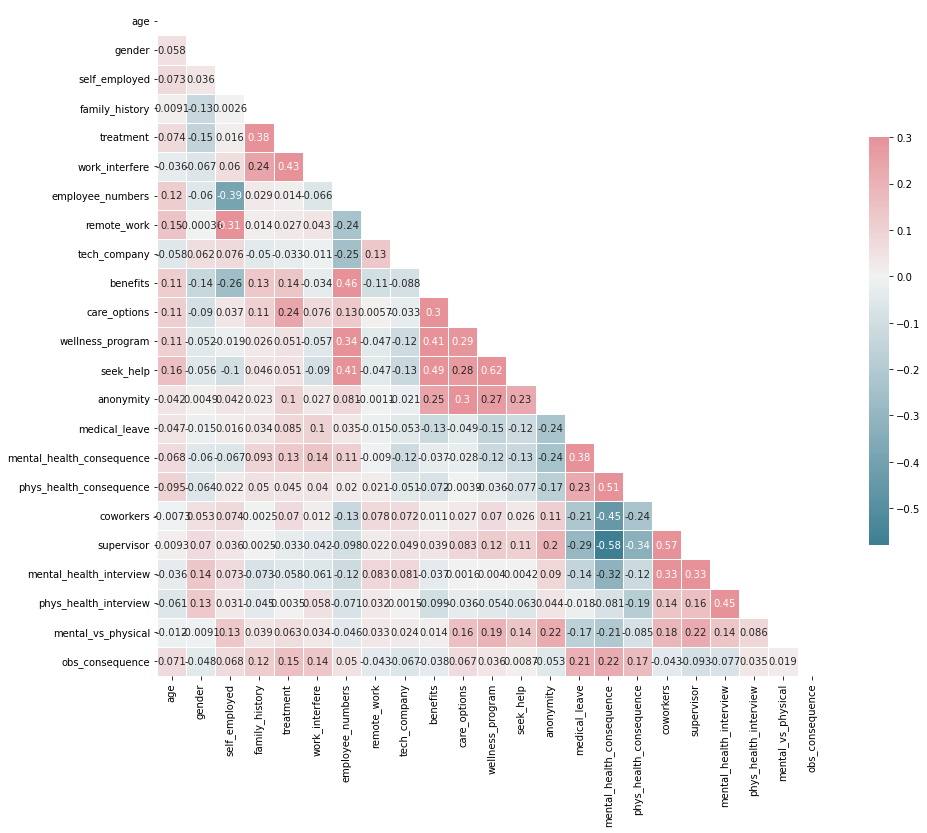

In [412]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()


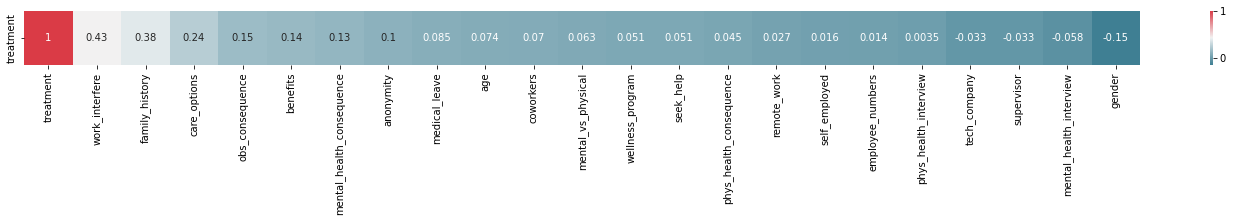

In [413]:
f, ax = plt.subplots(figsize=(25, 1))
treatment = corr.sort_values(by=['treatment'], ascending=False).head(1).T
treatment = treatment.sort_values(by=['treatment'],ascending=False).T
sns.heatmap(treatment, cmap=cmap, annot=True)
plt.show()

#### Il y a une forte corrélation entre les variables 'wellness_program', 'seek_help'. 
#### Pour notre variable cible (traitement), nous observons une forte corrélation avec les variables 'care_options','benefits', 'mental_health_consequences' qui sont tous des variables relies a l'environnement du travail. On observe aussi une forte coorelation avec 'work_interfere' ansi que 'family_history'.

# II. Modelisation

In [414]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

### 1. Division Data en train et test



In [415]:
X = data.drop(['treatment'], axis =1)
y = data.treatment
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify = y,test_size=0.2,random_state=42)


In [416]:
X_train.nunique()

age                          43
gender                        3
self_employed                 2
family_history                2
work_interfere                5
employee_numbers              6
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
medical_leave                 5
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
dtype: int64

In [417]:
print(f'Train_data Dimensions : {X_train.shape}\n Test data dimension : {X_test.shape}')

Train_data Dimensions : (1000, 22)
 Test data dimension : (251, 22)


#### Dans l'apprentissage supervisé, les algorithmes apprennent à partir de données étiquetées. Dans notre cas, nous utilisons une technique de classification pour déterminer quelle classe correspond à "oui" et quelle classe correspond à "non". nous utilisons trois modèles de base et quatre modèles d'ensemble pour effectuer ces prédictions.

Modèles de base :

-Régression logistique

-Arbre de décision

-K plus proches voisins (knn)

-SVM - Support Vector Machines


#### Modèles d'ensemble :

-Random Forest

-Gradient Boosting

-Classifieur XGBoost (xgboost)

-Aa Boost

In [418]:
names = [
    'Logistic Regression',
    'KNN',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
]
classifiers = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    SVC(probability=True, random_state=42),
    NuSVC(probability=True, random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
]

In [419]:
def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy, 
    ROC_AUC and Recall and returns the values in a dataframe
    '''
    
    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)

        pred_proba = clf.predict_proba(X_test)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_test, pred_proba)        
        roc_auc = auc(fpr, tpr)
        
        # confusion matric, cm
        cm = confusion_matrix(y_test, pred) 
        
        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])
        
        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])
        
        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = data_table.append(df)     

    return(np.round(data_table.reset_index(drop=True), 2))

In [420]:
results = score_summary(names, classifiers)
print(results)

C:\Users\admin\AppData\Local\Temp\ipykernel_14412\212421710.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(df)
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\212421710.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(df)
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\212421710.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(df)
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\212421710.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(df)
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\21

            Classifier   Accuracy   ROC_AUC    Recall Precision        F1
0  Logistic Regression  78.087649  0.834138  0.748031  0.805085   0.77551
1                  KNN  70.916335  0.777908  0.653543  0.741071  0.694561
2      Support Vectors  76.095618  0.830391  0.748031  0.772358      0.76
3               Nu SVC  76.095618  0.816389  0.755906     0.768  0.761905
4        Decision Tree  74.900398  0.749111  0.740157  0.758065  0.749004
5        Random Forest    81.2749  0.896019  0.834646   0.80303  0.818533
6             AdaBoost  83.665339  0.900178  0.874016  0.816176  0.844106
7    Gradient Boosting   82.47012  0.911989  0.858268  0.807407  0.832061
8          Naive Bayes  78.486056  0.824041  0.748031  0.811966  0.778689


C:\Users\admin\AppData\Local\Temp\ipykernel_14412\212421710.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(df)
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\212421710.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(df)


C:\Users\admin\AppData\Local\Temp\ipykernel_14412\212421710.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(df)
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\212421710.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(df)
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\212421710.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(df)
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\212421710.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_table = data_table.append(df)
C:\Users\admin\AppData\Local\Temp\ipykernel_14412\21

<Figure size 720x360 with 0 Axes>

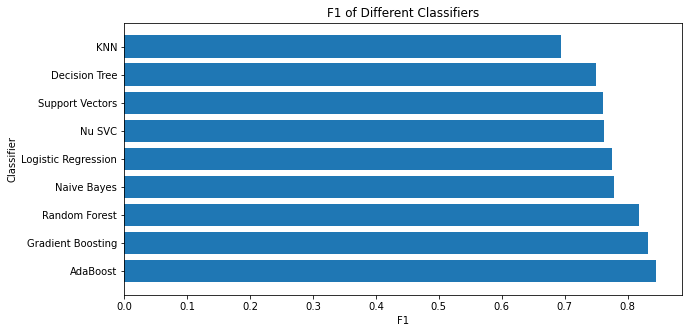

<Figure size 720x360 with 0 Axes>

In [421]:
results = score_summary(names, classifiers)
results_sorted = results.sort_values(by="F1", ascending=False)
# Création du graphique à barres
plt.figure(figsize=(10, 5))
plt.barh(results_sorted["Classifier"], results_sorted["F1"])
plt.xlabel("F1")
plt.ylabel("Classifier")
plt.title("F1 of Different Classifiers")
plt.figure(figsize = (10,5))

#### En analysant les résultats du tableau, on peut remarquer qu'il existe trois modèles ayant obtenu les meilleures performances sur toutes les mesures; AdaBoost, Gradient Boosting et Random Forest. Ce sont des modeles ensemblistes. Ces modèles combinent plusieurs sous-modèles plus faibles pour améliorer la prédiction globale. Ces modèles ensemblistes peuvent être plus performants en raison de la nature complexe et interdépendante des facteurs liés à la santé mentale. Ces modèles peuvent identifier les interactions entre différentes variables et exploiter les informations contenues dans plusieurs sous-modèles pour améliorer la précision des prédictions. Ils peuvent également être plus résistants au bruit et aux erreurs de mesure, ce qui est souvent présent dans les enquêtes sur la santé mentale. 

#### Nous allons donc choisir ces modèles pour effectuer une recherche de grille afin d'optimiser davantage leurs hyperparamètres et obtenir les meilleures performances possibles.

### 1. Random Forest GridSearchCV

In [322]:
randf=RandomForestClassifier()
param_grid_ra = { 
    'n_estimators': [200,300,500,600],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [323]:
grid_search_ra = GridSearchCV(randf,param_grid_ra,cv= 5)
grid_search_ra.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300, 500, 600]})

In [324]:
grid_search_ra.best_params_
model_final_ranf=grid_search_ra.best_estimator_
model_final_ranf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       n_estimators=300)

#### Tracer la matrice de confusion de Neural Random Forest

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


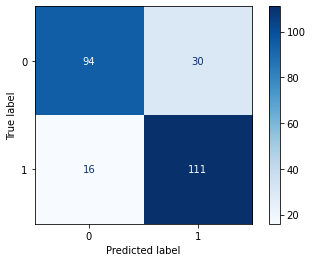

In [325]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_final_ranf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

#### Afficher le __`classification_report`__ de __`Random Forest`__


In [326]:
from sklearn.metrics import classification_report
y_pred=model_final_ranf.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       124
           1       0.79      0.87      0.83       127

    accuracy                           0.82       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.82      0.82      0.82       251



### Courbe Roc et Auc

AUC Score Naive Bayes : 0.8930657861315723


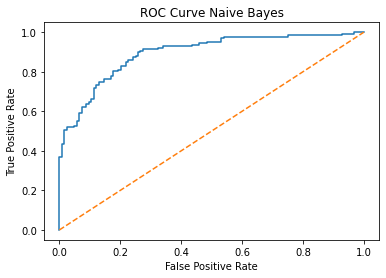

In [371]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = model_final_ranf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Curve Naive Bayes')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC Score Random Forest :', auc_score)

### 2. Gradient Boost GridSearchCV

In [427]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 1.0, 10.0],
    'max_depth': [3, 5, 7]
}
grad_boost = GradientBoostingClassifier(random_state=42)

In [428]:
grid_search = GridSearchCV(grad_boost, param_grid, cv=3)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [429]:
best_grad_boost = grid_search.best_estimator_
best_grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

#### Tracer la matrice de confusion de final_model_xgb

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


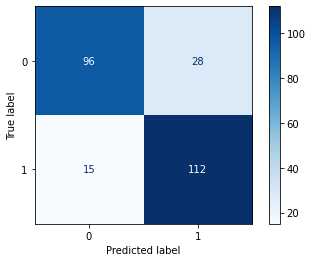

In [430]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_grad_boost, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

#### Afficher le __`classification_report`__ de __`final_model_xgb`__

In [431]:
from sklearn.metrics import classification_report
y_pred=best_grad_boost.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.77      0.82       124
           1       0.80      0.88      0.84       127

    accuracy                           0.83       251
   macro avg       0.83      0.83      0.83       251
weighted avg       0.83      0.83      0.83       251



### Courbe Roc et Auc

AUC Gradient Boost : 0.9121475742951486


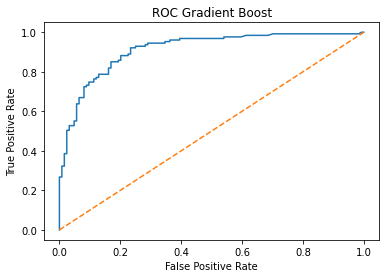

In [432]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = best_grad_boost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Gradient Boost')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC Gradient Boost :', auc_score)

### 3.  Ada Boost GridSearchCV

In [422]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}
ada = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(ada, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [423]:
best_ada_boost = grid_search.best_estimator_
best_ada_boost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)

#### Tracer la matrice de confusion de Ada Boost

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


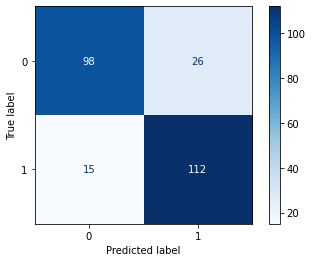

In [424]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_ada_boost, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

#### Afficher le __`classification_report`__ de __`Ada Boost`__

In [425]:
from sklearn.metrics import classification_report
y_pred=best_ada_boost.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       124
           1       0.81      0.88      0.85       127

    accuracy                           0.84       251
   macro avg       0.84      0.84      0.84       251
weighted avg       0.84      0.84      0.84       251



### Courbe Roc et Auc

AUC ADA Boost : 0.9077660655321311


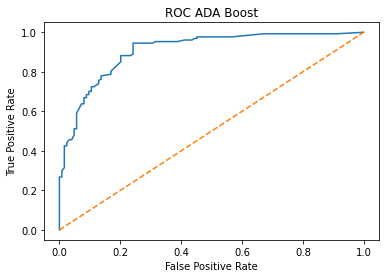

In [426]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = best_ada_boost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ADA Boost')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC ADA Boost :', auc_score)

### Comparaison entre les modeles apres tuning(GridSearchCV)

In [433]:
scores = pd.DataFrame({'f1-score avant tuning' : [0.82,0.83,0.84],'AUC score':[0.89,0.91,0.91]} 
                        ,index=['RandomForest','GDBoost','AdaBoost'])
scores

,f1-score avant tuning,AUC score
RandomForest,0.82,0.89
GDBoost,0.83,0.91
AdaBoost,0.84,0.91


#### On remarque qu'il n ya pas de difference entre les modeles avant tuning et apres. Le modele le plus preformant est ADA Boost classifier

## Identification des principales caractéristiques qui conduisent à des problèmes de santé mentale dans l'espace technologique

In [347]:
features=['age','gender','self_employed','family_history','work_interfere','employee_numbers','remote_work','tech_company','benefits','care_options','wellness_program','seek_help','anonymity','medical_leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence']

In [348]:
dataimp = {'feature_names': features, 'feature_importance': best_ada_boost.feature_importances_}
featureimp_df = pd.DataFrame(dataimp)
featureimp_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

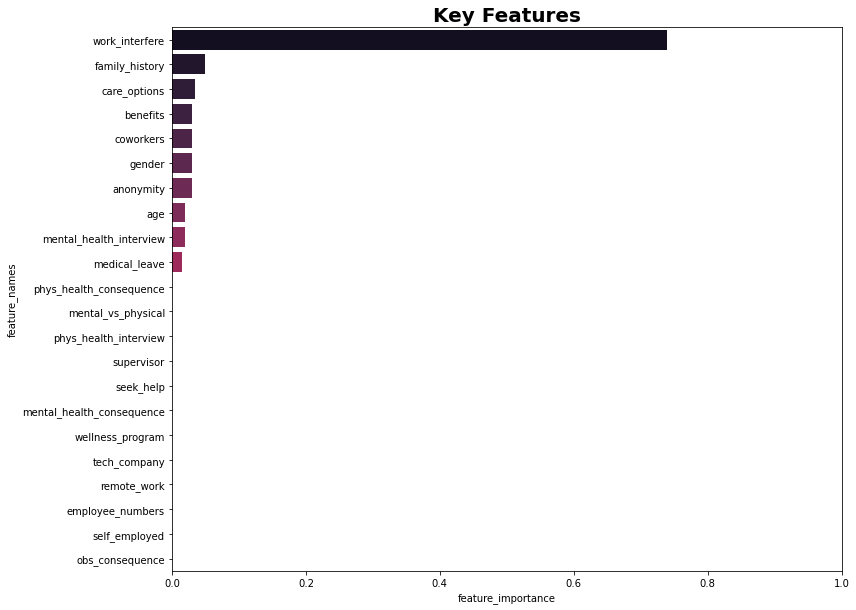

In [358]:
plt.figure(figsize=(12,10))
sns.barplot(data = featureimp_df, x = 'feature_importance' , y = 'feature_names' , palette='rocket')
plt.title("Key Features", fontsize=20, fontweight="bold")
plt.xlim(0, 1)
plt.show()

#### 'work_interfere' a la plus grande contribution. Cette resultat est attendue. Il est logique que cette variable soit un bon prédicteur, car si les problèmes de santé mentale ont un impact significatif sur le travail, il est plus probable que le participant nécessite un traitement. D'ou, l'entreprise devra demander si les problèmes de santé mentale de l'employé interfèrent avec le travail. 

#### Les antécédents familiaux peuvent être un indicateur de prédisposition génétique ou d'environnement familial propice aux troubles de santé mentale, ce qui peut augmenter la probabilité de traitement. L'âge peut également être un déclencheur, étant donné que la plupart d'entre eux sont jeunes, il y a donc de fortes chances qu'ils soient ouverts d'esprit pour se faire soigner.

#### Les facteurs liés à l'environnement de travail, tels que l'impact sur le travail, les politiques de soutien de l'entreprise 'care_options' et 'benefits' et la réaction des collègues'coworkers', 'medical_leave' jouent un rôle important dans la prévision des problèmes de santé mentale et de la nécessité de traitement. Les variables identifiées peuvent aider à comprendre les mécanismes et les déterminants de la santé mentale dans le contexte technologique.

#### Connaître certaines de ces caractéristiques à l'avance peut même aider à soutenir une personne qui peut avoir des problèmes de santé mentale et à la mettre en contact avec les ressources appropriées pour les employés.

###### 

#### Sur la base de la sélection des fonctionnalités en fonction du score de coefficient, nous avons décidé de supprimer manuellement les variables qui obtiennent un score null. Il y a Remote_work, Wellness_Program, Physical_Health_Consequence, mental_vs_physical, phys_health_interview, supervisor, seek_help, mental_health_consequences, wellness_program, tech_company, employee_numbers,self_employed,obs_consequnce.


In [434]:
data_tuning = data.copy()
data_tuning.drop(columns = ['self_employed', 'employee_numbers', 'remote_work', 'tech_company','wellness_program','seek_help','mental_health_consequence','phys_health_consequence','supervisor','phys_health_interview','mental_vs_physical','obs_consequence'], inplace = True)
data_tuning.head()


,age,gender,family_history,treatment,work_interfere,benefits,care_options,anonymity,medical_leave,coworkers,mental_health_interview
0,0.351852,0.0,0.0,1,4.0,2.0,1.0,2.0,1.0,1.0,0.0
1,0.481481,1.0,0.0,0,1.0,1.0,0.0,1.0,2.0,0.0,0.0
2,0.259259,1.0,0.0,0,1.0,0.0,0.0,1.0,3.0,2.0,2.0
3,0.240741,1.0,1.0,1,4.0,0.0,2.0,0.0,3.0,1.0,1.0
4,0.240741,1.0,0.0,0,0.0,2.0,0.0,1.0,2.0,1.0,2.0


In [438]:
X_New = data_tuning.drop('treatment', axis = 1)
y_New = data_tuning['treatment']
X_train_n,X_test_n,y_train_n,y_test_n=train_test_split(X_New,y_New,test_size=0.2,random_state=42)

In [440]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}
ada_n = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(ada_n, param_grid, cv=5)
grid_search.fit(X_train_n, y_train_n)
print('Best hyperparameters:', grid_search.best_params_)
best_ada_boost_N = grid_search.best_estimator_
best_ada_boost_N.fit(X_train_n, y_train_n)

Best hyperparameters: {'learning_rate': 0.5, 'n_estimators': 50}


AdaBoostClassifier(learning_rate=0.5, random_state=42)

In [441]:
from sklearn.metrics import classification_report
y_pred_n=best_ada_boost_N.predict(X_test_n)
print(classification_report(y_test_n,y_pred_n,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       113
           1       0.80      0.89      0.85       138

    accuracy                           0.82       251
   macro avg       0.83      0.81      0.82       251
weighted avg       0.82      0.82      0.82       251



### ROC curve

AUC ADA Boost : 0.9077660655321311


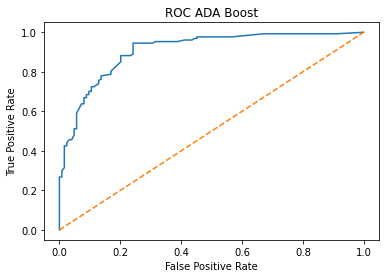

In [442]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = best_ada_boost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ADA Boost')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print('AUC ADA Boost :', auc_score)

#### On remarque que le score de f1 a diminue legerement.En effet, l'absence de contribution significative des variables supprimes dans notre modèle ne signifie pas qu'elles sont dénuées de sens ou d'importance dans l'étude de la santé mentale. Ces variables peuvent avoir des relations complexes avec d'autres facteurs non inclus dans notre modèle ou peuvent nécessiter des considérations contextuelles supplémentaires. Nous allons donc garder le modele avant selection des variables.

#### Finalement, selon le profil des employers, Les entreprises doivent savoir que l'age et les antécédents familiaux influencent grandement la décision de faire soigner les employés. 

#### Ensuite, on trouve l'interférence au travail qui est la plus influente. Cela signifie que l'entreprise devrait envisager de fournir des installations pour eviter le stress au travail des employés comme la création des salles privée ou silencieuses au cas où auraient besoin d'un moment privé pour se soulager.

#### Finalement selon les options founis par l'entrprise, les resultats ont montres qu'ils jouent un role tres important dans la prevision de traitement. Ellent doivent offrir une bonne prestation aux employés afin qu'ils puissent maintenir leur santé mentale. 

